# จัดกลุ่มนักท่องเที่ยวและคาดการรายได้ที่ได้จากนักท่องเที่ยวในกรุงเทพฯ

### ชื่อกลุ่ม:  Batman
### ชื่อ-นามสกุล สมาชิก:
* 6142732426 [จิราภา จริยคุณ](https://github.com/jirapajj)
* 6142785726 [ทศวรรษ จันทร์ประดับฟ้า](https://github.com/Tosawadh)

# แหล่งที่มา
- [สรุปรายได้และค่าใช้จ่ายการท่องเที่ยวจากนักท่องเที่ยวชาวต่างชาติที่เดินทางเข้าประเทศไทย ปี 2019](https://data.go.th/dataset/tourism-receipts-2019)
- [สรุปสถานการณ์ท่องเที่ยวภายในประเทศ จังหวัดกรุงเทพฯ 2010 - 2019](http://203.155.220.117:8080/BMAWWW/html_statistic/index2.php?group_id=587)

# Important Links
- [Github](https://github.com/Tosawadh/th-tourist-ml)
- [Youtube Video](https://youtu.be/rs8ATz76cb8)

---

# บทนำ

เนื่องจากในช่วงไม่กี่ปีที่ผ่านมา การท่องเที่ยวในประเทศไทยนั้นได้รับผลกระทบจาก COVID-19 ทำให้นักท่องเที่ยวต่างชาติเข้ามาเที่ยวไม่ได้ ส่งผลให้ให้รายได้จากการท่องเที่ยวในประเทศไทยลดลงอย่างเฉียบพลัน ทำให้หลายกิจการที่เกี่ยวกับการท่องเที่ยวต้องปิดตัวลง

ผู้จัดทำจึงเกิดความสนใจอยากรู้เกี่ยวกับนักท่องเที่ยวต่างชาติว่า ประเทศใดนำเงินมาใช้จ่ายกับสินค้าในหมวดหมู่ใดเป็นส่วนใหญ่ และเราจะจัดหมวดหมู่นักท่องเที่ยวเหล่านี้ได้อย่างไร นอกจากนี้ เรายังได้สร้าง model เพื่อมาคาดการรายได้ที่ได้จากนักท่องเที่ยวในกรุงเทพฯ อีกด้วย

# ดึงข้อมูลสรุปรายได้และค่าใช้จ่ายการท่องเที่ยวจากนักท่องเที่ยวชาวต่างชาติที่เดินทางเข้าประเทศไทยในปี 2019
* ค่าข้อมูลในตารางคือ จำนวนเงินจากนักท่องเที่ยวชาวต่างชาติจากแต่ละประเทศที่เดินทางเข้าประเทศไทยใช้จ่ายตามแต่ละหมวด (หน่วย: ล้านบาท)

In [1]:
import pandas as pd
import numpy as np         
import re                  

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets  
from ipywidgets import interact

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
colnames = ['Country', 'Total', 'Shopping', 'Entertainment', 'Sightseeing', 'Accomodation', 'Food_Drinks', 'Local_Transport', 'Medical_Care', 'Miscellenous']
url = 'https://github.com/Tosawadh/th-tourist-ml/raw/main/tourism-receipts-from-international-tourist-arrivals-by-expenditure-item_2019.csv'

df_1 = pd.read_csv(url, skiprows=range(0,7), nrows=61, header=None, usecols=range(10), names=colnames)
df_1.head()

,Country,Total,Shopping,Entertainment,Sightseeing,Accomodation,Food_Drinks,Local_Transport,Medical_Care,Miscellenous
0,East Asia,"1,125,223.49","326,755.17","95,553.62","43,724.38","297,764.48","225,943.77","95,953.73","22,057.00","17,471.34"
1,Asean,"342,370.64","110,421.75","22,866.57","8,030.32","86,859.13","68,252.62","26,904.40","14,667.44","4,368.41"
2,Brunei,945.13,320.83,61.26,23.17,260.53,180.98,71.31,11.00,16.05
3,Cambodia,"39,277.88","12,883.98","1,487.09",722.25,"7,403.81","7,136.00","3,021.43","6,285.81",337.51
4,Indonesia,"18,333.62","5,609.68",749.66,621.23,"5,525.29","3,662.25","1,744.51",181.76,239.24


## เช็คข้อมูล

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          61 non-null     object
 1   Total            61 non-null     object
 2   Shopping         61 non-null     object
 3   Entertainment    61 non-null     object
 4   Sightseeing      61 non-null     object
 5   Accomodation     61 non-null     object
 6   Food_Drinks      61 non-null     object
 7   Local_Transport  61 non-null     object
 8   Medical_Care     61 non-null     object
 9   Miscellenous     61 non-null     object
dtypes: object(10)
memory usage: 4.9+ KB


ข้อมูลไม่พบ missing value แต่ต้องเปลี่ยนประเภทข้อมูล

## เปลี่ยนประเภทข้อมูล

In [4]:
df_1.columns

Index(['Country', 'Total', 'Shopping', 'Entertainment', 'Sightseeing',
       'Accomodation', 'Food_Drinks', 'Local_Transport', 'Medical_Care',
       'Miscellenous'],
      dtype='object')

In [5]:
df_1[['Total', 'Shopping', 'Entertainment', 'Sightseeing',
       'Accomodation', 'Food_Drinks', 'Local_Transport', 'Medical_Care',
       'Miscellenous']]=df_1[['Total', 'Shopping', 'Entertainment', 'Sightseeing',
       'Accomodation', 'Food_Drinks', 'Local_Transport', 'Medical_Care',
       'Miscellenous']].apply(lambda x: x.str.replace(r'[^\d\.]', '').astype(float))

df_1.head()

C:\Users\tosaw\AppData\Local\Temp/ipykernel_6908/965068427.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  'Miscellenous']].apply(lambda x: x.str.replace(r'[^\d\.]', '').astype(float))


,Country,Total,Shopping,Entertainment,Sightseeing,Accomodation,Food_Drinks,Local_Transport,Medical_Care,Miscellenous
0,East Asia,1125223.49,326755.17,95553.62,43724.38,297764.48,225943.77,95953.73,22057.00,17471.34
1,Asean,342370.64,110421.75,22866.57,8030.32,86859.13,68252.62,26904.40,14667.44,4368.41
2,Brunei,945.13,320.83,61.26,23.17,260.53,180.98,71.31,11.00,16.05
3,Cambodia,39277.88,12883.98,1487.09,722.25,7403.81,7136.00,3021.43,6285.81,337.51
4,Indonesia,18333.62,5609.68,749.66,621.23,5525.29,3662.25,1744.51,181.76,239.24


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          61 non-null     object 
 1   Total            61 non-null     float64
 2   Shopping         61 non-null     float64
 3   Entertainment    61 non-null     float64
 4   Sightseeing      61 non-null     float64
 5   Accomodation     61 non-null     float64
 6   Food_Drinks      61 non-null     float64
 7   Local_Transport  61 non-null     float64
 8   Medical_Care     61 non-null     float64
 9   Miscellenous     61 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.9+ KB


## EDA

ข้อมูลในตารางงจะมีแถวที่รวมค่าใช้จ่ายนักท่องเที่ยวที่ columns country เป็นชื่อทวีปอยู่ ได้แก่row East Asia, Asean, Europe, The Americas, South Asia,Oceania, Middle East, Africa ข้อมูลส่วนนี้จะไม่เอามาวิเคราะห์

In [7]:
continent = ['East Asia', 'Asean', 'Europe', 'The Americas', 'South Asia','Oceania', 'Middle East', 'Africa']
df_1[df_1.Country.isin(continent)]

,Country,Total,Shopping,Entertainment,Sightseeing,Accomodation,Food_Drinks,Local_Transport,Medical_Care,Miscellenous
0,East Asia,1125223.49,326755.17,95553.62,43724.38,297764.48,225943.77,95953.73,22057.00,17471.34
1,Asean,342370.64,110421.75,22866.57,8030.32,86859.13,68252.62,26904.40,14667.44,4368.41
17,Europe,448743.81,67614.76,41855.35,17302.87,147792.43,108298.73,53852.89,5368.72,6658.06
34,The Americas,105087.99,15562.21,10317.61,5441.32,33158.01,23250.46,13891.28,1742.34,1724.76
40,South Asia,100168.16,26119.69,11365.69,3794.40,26328.26,20023.63,9622.25,1392.78,1521.46
47,Oceania,61898.66,10223.63,6724.35,2332.51,19802.11,13474.42,6255.98,1949.80,1135.86
51,Middle East,57381.19,14062.24,5867.22,1499.63,16219.25,11073.86,5720.32,2243.23,695.44
58,Africa,13304.65,4231.50,994.42,383.08,3430.47,2522.42,1236.03,324.97,181.76


## ยอดค่าใช้จ่ายนักท่องเที่ยวที่มาเที่ยวไทยแบ่งตามประเทศ

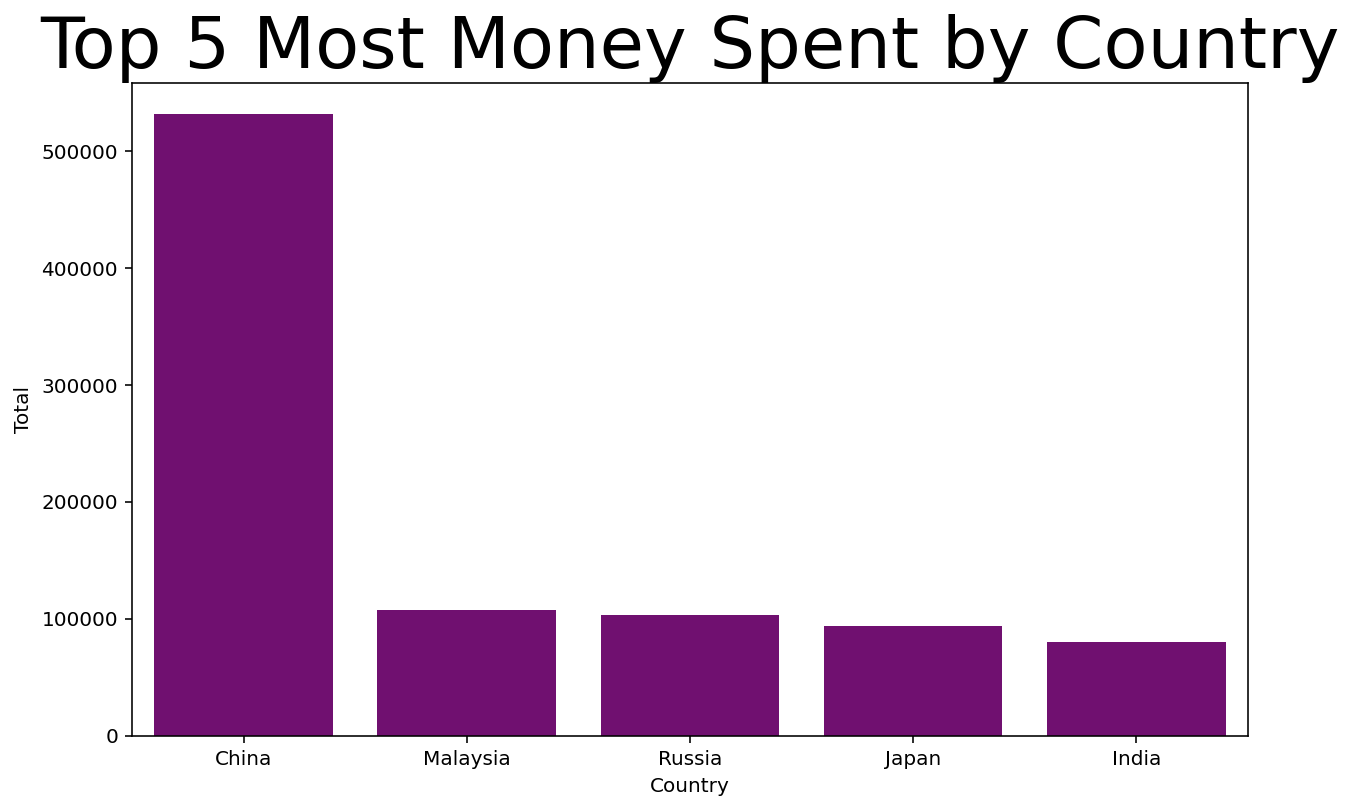

In [8]:
data = df_1[~df_1.Country.isin(continent)].sort_values(by='Total', ascending= False).head(5)

plt.figure(figsize=(10,6))
ax = sns.barplot(x='Country', y='Total', 
            data=data,
            ci=None,color='purple' )
ax.set_title('Top 5 Most Money Spent by Country', fontsize=36, fontweight=0)

plt.show()

จากกราฟจะเห็นได้ว่า นักท่องเที่ยวจากจีนใช้จ่ายในประเทศเทศของเรามากสุดมากกว่า 5 แสนล้านบาท รองลงมาเป็นมาเลเซีย รัสเซีย ญี่ปุ่นและอินเดีย

## ยอดค่าใช้จ่ายนักท่องเที่ยวที่มาเที่ยวไทยแบ่งตามแต่ละด้าน

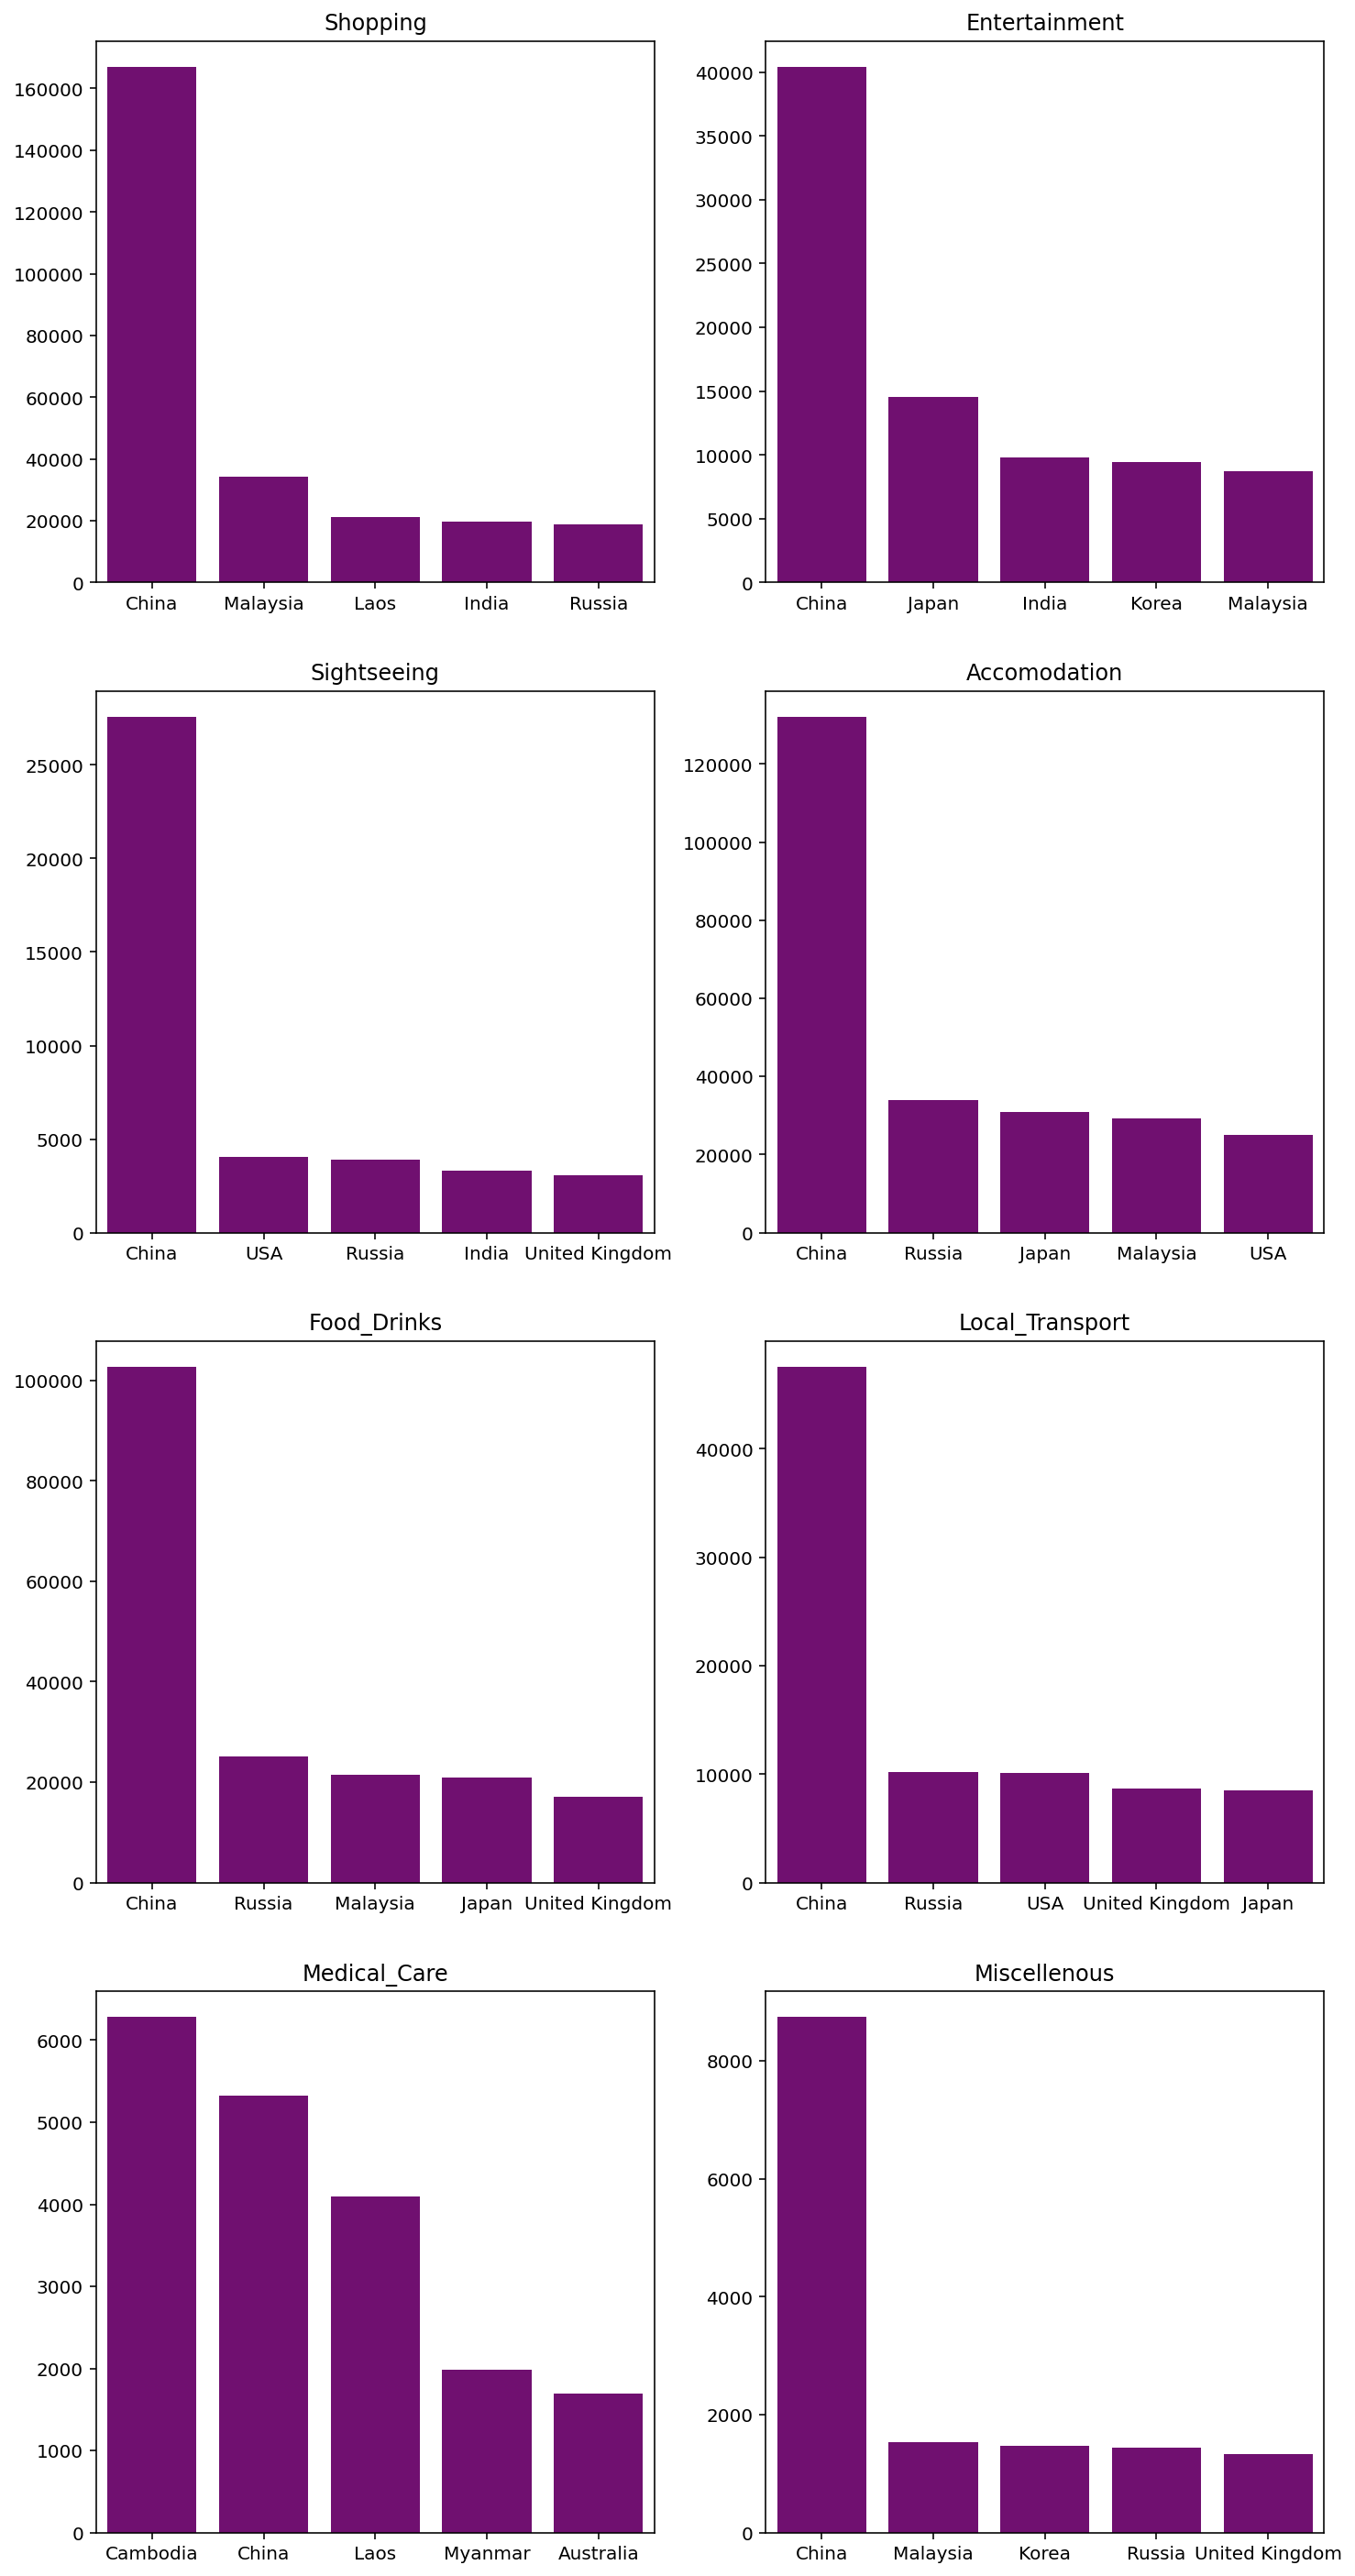

In [9]:
cols=['Shopping', 'Entertainment', 'Sightseeing',
       'Accomodation', 'Food_Drinks', 'Local_Transport', 'Medical_Care',
       'Miscellenous']

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 25))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.barplot(x='Country', y=col, data=df_1[~df_1.Country.isin(continent)].sort_values(by=col, ascending= False).head(5), color='purple', ax=ax[i])
    ax[i].title.set_text(col)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")

* ในแต่ละประเภทการใช้จ่ายจะเห็นได้ว่า นักท่องเที่ยวจีนจะใช้จ่ายมากสุด ยกเว้นหมวด Medical care ที่นักท่องเที่ยวกัมพูชาจะใช้จ่ายในส่วนนี้มากสุด
* ในหมวด Medical care จะเห็นได้ว่า 3ประเทศจาก top 5 เป็นเพื่อนบ้านของเรา คือ กัมพูชา ลาว พม่า
* ประเทศลาวที่ไม่ได้ติดอันดับ 1 ใน 5 ประเทศที่ใช้จ่ายรวมสูง แต่ติดอันดับ 1 ใน 5 ในหมวด Shopping และ Medical care

## การใช้จ่ายหมวดไหนเป็นที่สนใจของนักท่องเที่ยว

In [10]:
data = df_1[~df_1.Country.isin(continent)]
data = data.iloc[:, 2:].sum(axis=0).sort_values(ascending= False).to_frame()
data.style.bar(color=["violet"], align="zero")

,0
Accomodation,544495.010000
Shopping,464569.200000
Food_Drinks,404587.290000
Local_Transport,186532.480000
Entertainment,172678.260000
Sightseeing,74478.190000
Medical_Care,35078.840000
Miscellenous,29388.680000


จะเห็นได้ว่านักท่องเที่ยวต่างชาติเอาเงินมาใช้จ่ายกับสินค้าหมวดที่พักมากที่สุด รองลงมาเป็น Shopping และ อาหารกับเครื่องดื่ม น้อยที่สุดจะเป็นการรักษาทางการแพทย์

จากการทำ EDA นี้ทำให้อยากรู้ว่าเราจะจัดกลุ่มนักท่องเที่ยวยังไง ตามจำนวนเงินที่จ่ายตามหมวดหมู่ค่าใช้จ่าย

# Model 1 จัดกลุ่มนักท่องเที่ยวแต่ละประเทศ
โดยใช้วิธี K-Means Clustering

## เอาข้อมูลที่ไม่เกี่ยวข้องออก

In [11]:
# ข้อมูลที่เป็นค่าประเทศอื่น ๆ ในทวีปนั้น
others = list(df_1[df_1.Country.str.contains('others', case=False)].Country)
others

['Others in East Asia',
 'Others in Europe',
 'Others  in America',
 'Others in South Asia',
 'Others  in Ociania',
 'Others in Middle East',
 'Others in Africa']

In [12]:
# ข้อมูลที่เป็นค่าทวีป
continent

['East Asia',
 'Asean',
 'Europe',
 'The Americas',
 'South Asia',
 'Oceania',
 'Middle East',
 'Africa']

## ดูการกระจายตัวของข้อมูล

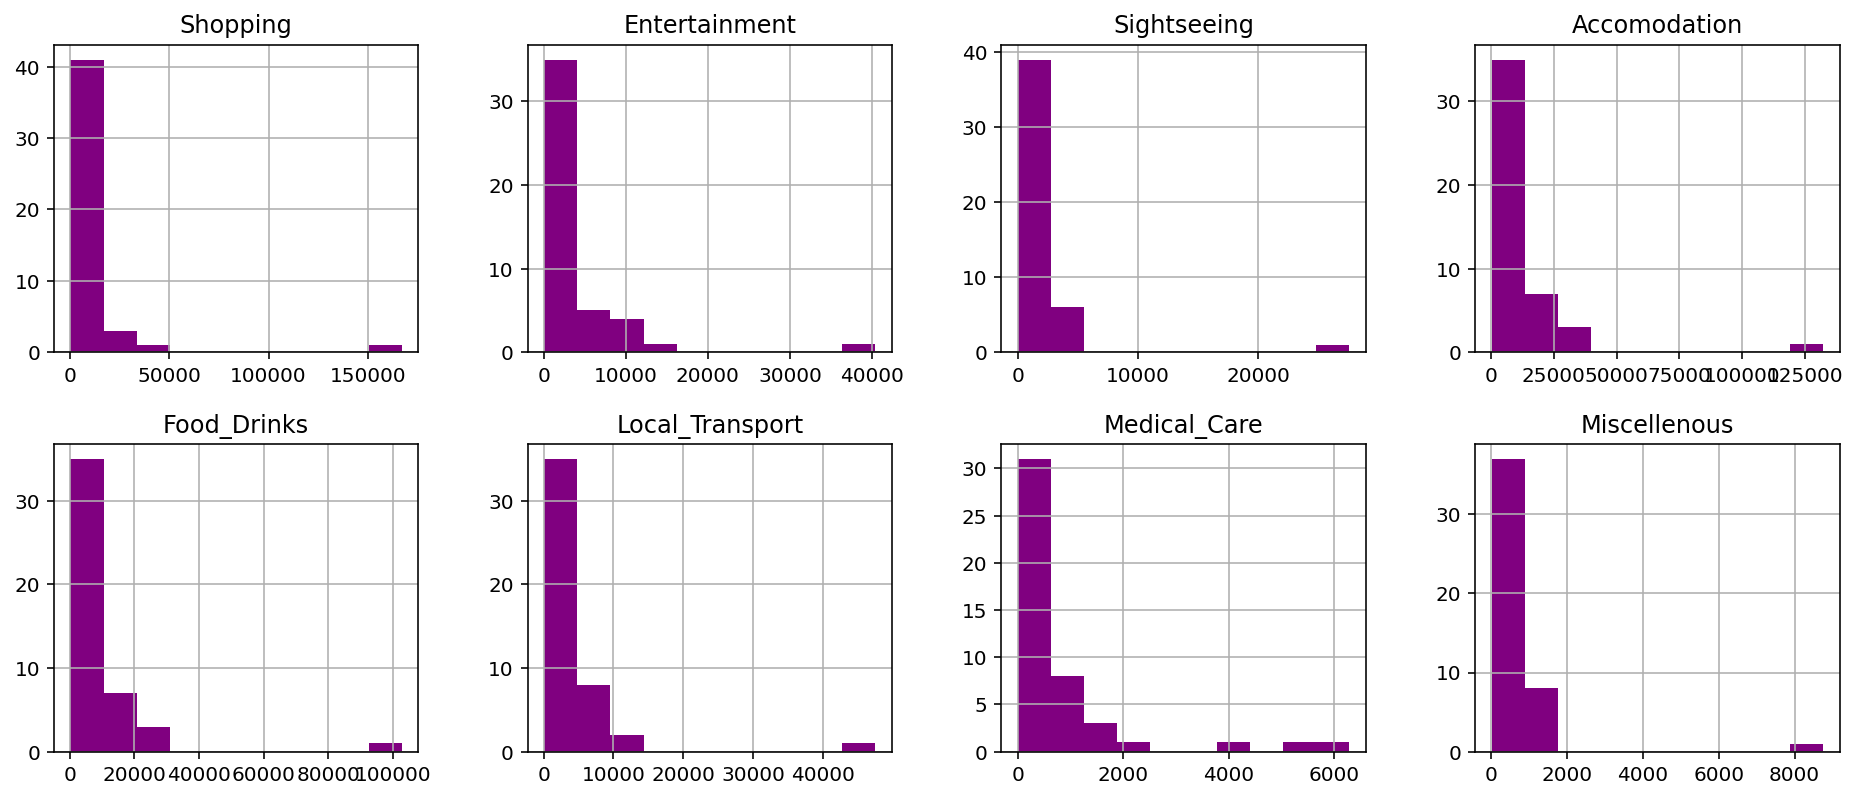

In [13]:
unwanted_row = continent + others
df_km = df_1[~df_1.Country.isin(unwanted_row)]
cols=['Shopping', 'Entertainment', 'Sightseeing',
       'Accomodation', 'Food_Drinks', 'Local_Transport', 'Medical_Care',
       'Miscellenous']

df_km[cols].hist(layout=(2, 4), figsize=(16, 6.5), color='purple');

ข้อมูลที่กระโดดแยกออกมาคือ ข้อมูลของประเทศจีน ซึ่งเป็นปกติเพราะนักท่องเที่ยวที่มาเที่ยวไทยเยอะเป็นอันดับ 1 คือจีน

## ทำ feature แต่ละตัว ให้อยู่ในช่วงเดียวกัน
โดยใช้วิธี Yeo-Johnson transformation

In [14]:
from sklearn import preprocessing

In [15]:
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True) 
mat = pt.fit_transform(df_km[cols])
mat[:5].round(4)

array([[-2.0465, -2.4316, -2.3588, -2.1697, -2.2233, -2.3305, -1.6235,
        -1.9119],
       [ 0.9734, -0.0287,  0.1958,  0.2733,  0.4665,  0.3832,  2.1262,
         0.2361],
       [ 0.3732, -0.5453,  0.0869,  0.051 , -0.0469, -0.0464, -0.1384,
        -0.0118],
       [ 1.317 ,  0.5199,  0.3173,  0.6931,  0.8266,  0.6469,  1.8294,
         0.3481],
       [ 1.6274,  1.3057,  1.2036,  1.3363,  1.3359,  1.2095,  0.9337,
         1.3295]])

In [16]:
# เก็บค่าที่scaleแล้วเป็นdataframe

df_km_trans=pd.concat([df_km['Country'].reset_index(drop=True), pd.DataFrame(mat, columns=cols)], axis='columns')
df_km_trans.head()

,Country,Shopping,Entertainment,Sightseeing,Accomodation,Food_Drinks,Local_Transport,Medical_Care,Miscellenous
0,Brunei,-2.046502,-2.431647,-2.358765,-2.169716,-2.223275,-2.330456,-1.623493,-1.911875
1,Cambodia,0.973409,-0.028654,0.195769,0.273335,0.466464,0.383222,2.126194,0.236060
2,Indonesia,0.373171,-0.545268,0.086880,0.051032,-0.046873,-0.046408,-0.138439,-0.011807
3,Laos,1.317043,0.519939,0.317331,0.693059,0.826569,0.646869,1.829361,0.348137
4,Malaysia,1.627395,1.305656,1.203621,1.336265,1.335902,1.209484,0.933661,1.329472


## กราฟการกระจายตัวของข้อมูลหลังscale dataแล้ว

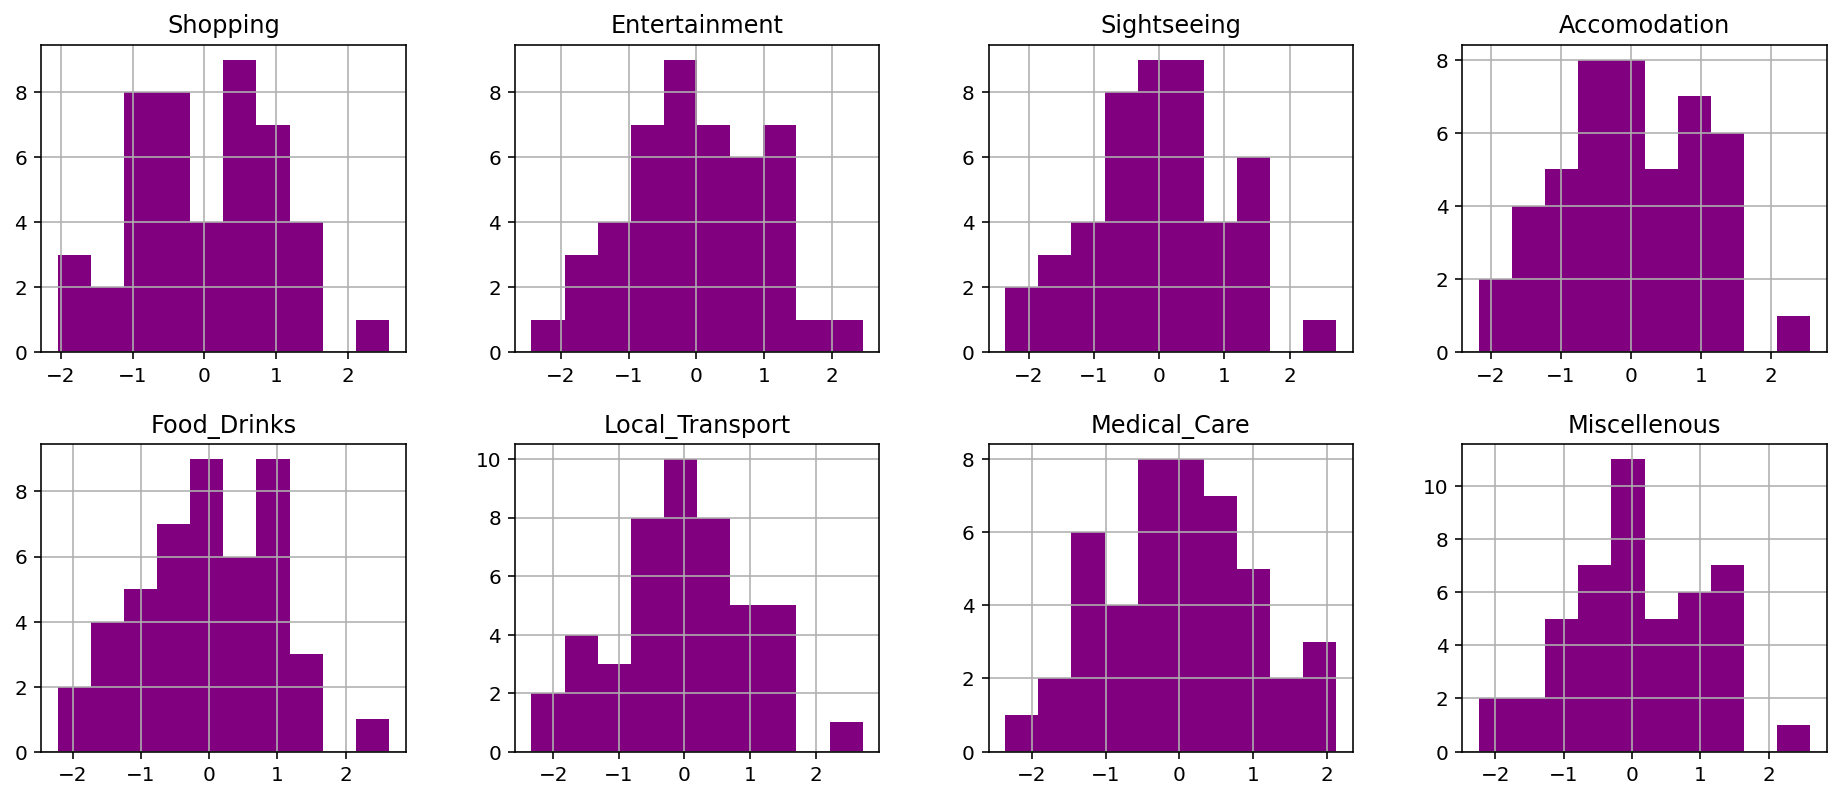

In [17]:
cols=['Shopping', 'Entertainment', 'Sightseeing',
       'Accomodation', 'Food_Drinks', 'Local_Transport', 'Medical_Care',
       'Miscellenous']

df_km_trans[cols].hist(layout=(2, 4), figsize=(16, 6.5), color='purple');

ข้อมูลแต่ละหมวดอยู่ในช่วงเดียวกันแล้ว

##  หาจำนวน cluster ที่เหมาะสม
โดยใช้วิธี elbow

In [18]:
from sklearn.cluster import KMeans

In [19]:
X = df_km_trans[['Shopping', 'Entertainment', 'Sightseeing',
       'Accomodation', 'Food_Drinks', 'Local_Transport', 'Medical_Care',
       'Miscellenous']]


In [20]:
def elbow_plot(X, from_k=2, to_k=5):
    ssd=[]                                 

    plt.figure(figsize=(10, 5))
    for k in range(from_k, to_k + 1):
        m=KMeans(n_clusters=k)
        m.fit(X)
        ssd.append([k, m.inertia_])        

    dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
    dd['pct_chg']=dd['ssd'].pct_change() * 100
    plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')

    for index, row in dd.iterrows():
        plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=12)

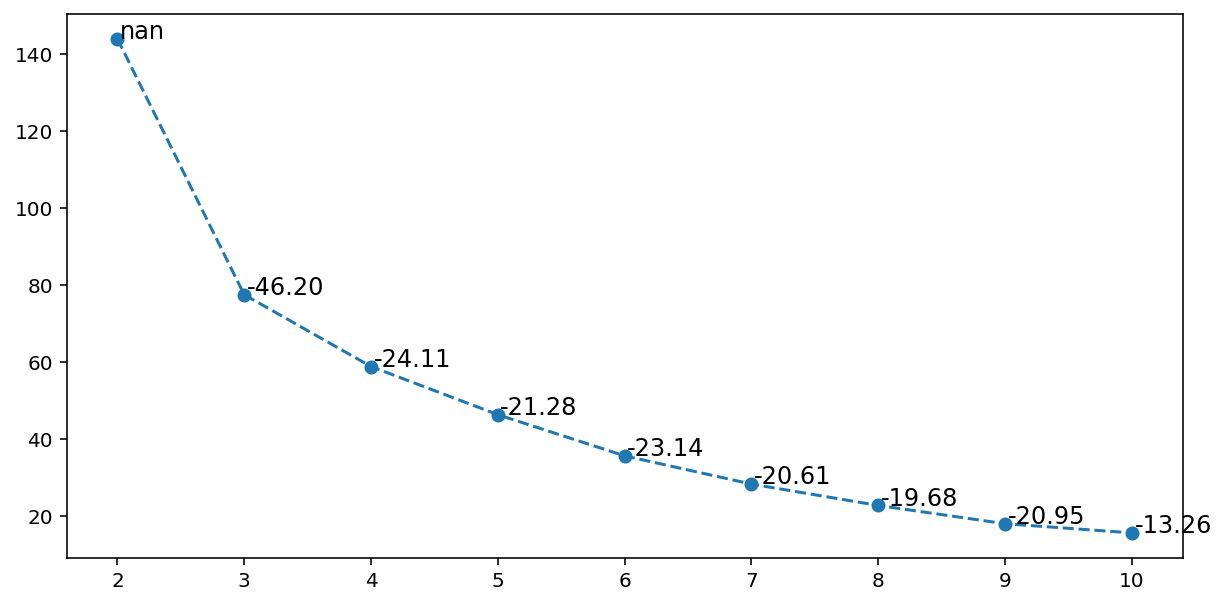

In [21]:
elbow_plot(X, 2, 10)

จากกราฟเลือกแบ่ง cluster เป็น 3 กลุ่ม เพราะ การเพิ่มจาก 2 cluster ไป 3 cluster ทำให้เปอร์เซ็นการเปลี่ยนแปลงค่า inertia (ระยะทาง sum squre distance ของทุกจุดเมื่อเทียบกับจุดศูนย์กลาง) ลดลงมากถึง 46.20%

หากใช้มากกว่า 3 cluster เปอร์เซ็นต์การเปลี่ยนแปลงจะลดลงในระดับที่ใกล้เคียงกัน จึงไม่เห็นผลต่างมาก

การแบ่งแบบ 3 cluster จึงเป็นการแบ่งที่น่าจะดีที่สุดสำหรับข้อมูลชุดนี้

## Train model

In [22]:
model_km = KMeans(n_clusters=3)
model_km

KMeans(n_clusters=3)

In [23]:
model_km.fit(X)

KMeans(n_clusters=3)

In [24]:
model_km.labels_

array([0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0,
       2, 2])

## ผลลัพธ์ที่ได้จากการทำ Model 1
เราจะได้เลขกลุ่มของแต่ละประเทศมา

In [25]:
# เอา label มารวมในตาราง
df_km_trans['cluster']=model_km.labels_
df_km_trans.head()

,Country,Shopping,Entertainment,Sightseeing,Accomodation,Food_Drinks,Local_Transport,Medical_Care,Miscellenous,cluster
0,Brunei,-2.046502,-2.431647,-2.358765,-2.169716,-2.223275,-2.330456,-1.623493,-1.911875,0
1,Cambodia,0.973409,-0.028654,0.195769,0.273335,0.466464,0.383222,2.126194,0.236060,1
2,Indonesia,0.373171,-0.545268,0.086880,0.051032,-0.046873,-0.046408,-0.138439,-0.011807,2
3,Laos,1.317043,0.519939,0.317331,0.693059,0.826569,0.646869,1.829361,0.348137,1
4,Malaysia,1.627395,1.305656,1.203621,1.336265,1.335902,1.209484,0.933661,1.329472,1


## ตั้งชื่อเรียก cluster

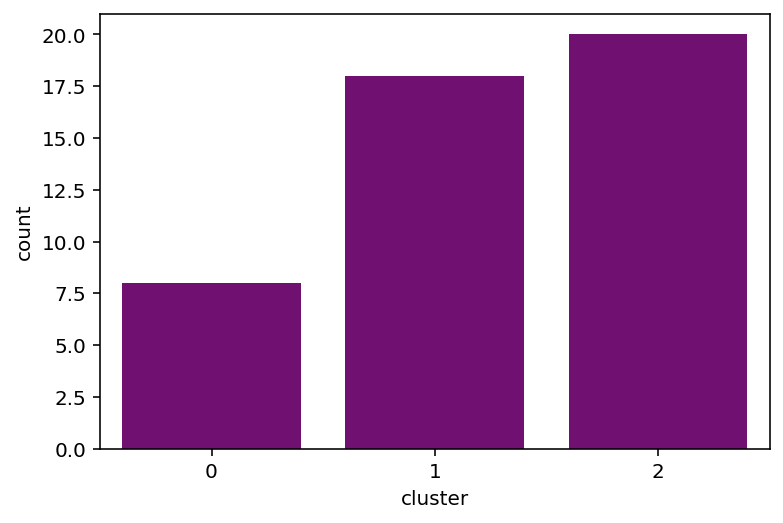

In [26]:
# ดูจำนวนแต่ละ cluster
sns.countplot(x='cluster', data=df_km_trans, color='purple');

การแบ่งเป็น 3 กลุ่มไม่ทำให้เกิดกลุ่มที่มีจำนวนสมาชิกน้อยเกินไปเช่น 1-3 ตัว

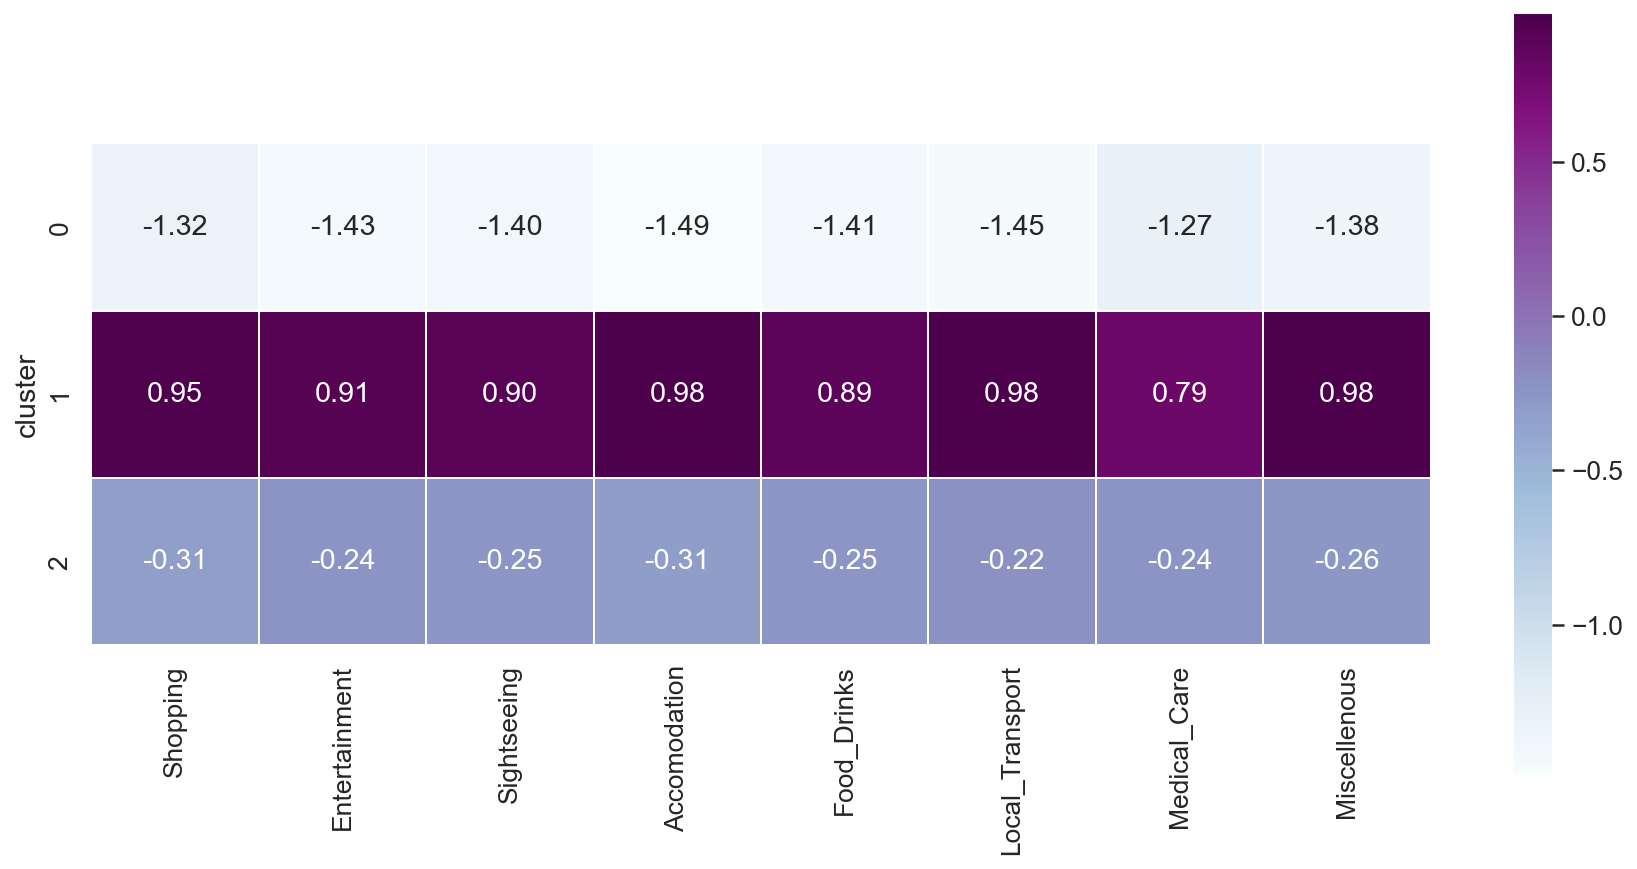

In [27]:
c = ['Shopping', 'Entertainment', 'Sightseeing',
       'Accomodation', 'Food_Drinks', 'Local_Transport', 'Medical_Care',
       'Miscellenous', 'cluster']

plt.figure(figsize=(15, 7))
sns.set(font_scale=1.2)
sns.heatmap(df_km_trans[c].groupby('cluster').median(), cmap="BuPu", linewidths=1, 
            square=True, annot=True, fmt='.2f');

* cluster สีเข้มสุด คือ กลุ่มประเทศลูกค้ารายหลัก/ลูกค้าชั้นดี ซึ่งนักท่องเที่ยวจากประเทศกลุ่มนี้จะสร้างรายได้ให้กับไทยมากเพราะเป็นกลุ่มใช้จ่ายในไทยตามหมวดต่างๆ เยอะ และนักท่องเที่ยวกลุ่มนี้จะสามารถช่วยโปรโมทการท่องเที่ยวไทยในประเทศของตัวเองได้เป็นอย่างมาก รัฐบาลไทยหรือผู้ประกอบกิจการที่เกี่ยวกับการท่องเที่ยวหรือมีรายได้หลักเป็นนักท่องเที่ยวควรมีการสอบถามผลตอบรับจากนักท่องเที่ยวกลุ่มนี้และนำไปปรับปรุงให้ดียิ่งขึ้นได้ และกลุ่มนี้จะใช้จ่ายในหมวด ที่พัก, การขนส่งท้องถิ่น และเบ็ดเตล็ด มากเป็นพิเศษ 
* cluster สีเข้มปานกลาง คือ กลุ่มประเทศลูกค้ารายรองจากลูกค้าหลัก กลุ่มนี้จะสร้างรายได้ให้กับไทยปานกลาง และจะใช้จ่ายในหมวด การขนส่งท้องถิ่น มากสุด รองลงมาเป็นหมวดความบันเทิง และการรักษาทางการแพทย์ตามลำดับ
* cluster สีอ่อนสุด คือ กลุ่มประเทศลูกค้ารายเล็ก จะใช้จ่ายในหมวดการรักษาทางการแพทย์มากสุด

## cluster แต่ละกลุ่มมีประเทศอะไรบ้าง

In [28]:
df_km_label=pd.concat([df_km.reset_index(drop=True), pd.DataFrame(model_km.labels_, columns=['label'])], axis='columns')
df_km_label.head()


items = sorted(df_km_label['label'].unique().tolist())

w_category = widgets.Select(options=items)

@interact
def view(cluster=w_category):
    return df_km_label.loc[df_km_label['label']==cluster, :'Miscellenous'].sort_values(by='Total', ascending= False)

interactive(children=(Select(description='cluster', options=(0, 1, 2), value=0), Output()), _dom_classes=('wid…

---

นอกจากนี้ต้องการรู้เกี่ยวกับรายได้การท่องเที่ยวจากนักท่องเที่ยวชาวต่างชาติของกรุงเทพฯ จึงสร้าง 2 โมเดล ในการคาดเดาจำนวนนักท่องเที่ยวชาวต่างชาติที่มาเข้าพักในกรุงเทพฯ  และรายได้การท่องเที่ยวจากนักท่องเที่ยวชาวต่างชาติของกรุงเทพฯ เพื่อเป็นประโยชน์เปิดหรือสำรองห้องพักสำหรับนักท่องเที่ยวต่างชาติและประมาณการรายรับที่จะได้จากนักท่องเที่ยว

# ดึงข้อมูลสรุปสถานการณ์ท่องเที่ยวภายในประเทศ จังหวัดกรุงเทพฯ 2010-2019

In [29]:
#colnames = ['Country', 'Item', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
url = 'https://github.com/Tosawadh/th-tourist-ml/raw/main/Bangkok%20_Tourism_Situation.xlsx'

df_2 = pd.read_excel(url, skiprows=range(0,2), nrows=29)
df_2

,ภาค,จังหวัด,รายการ,รายการย่อย,ประเภทผู้เยี่ยมเยือน,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562
0,กรุงเทพมหานคร,กรุงเทพมหานคร,จำนวนผู้เยี่ยมเยือน,รวม,รวม,3.822290e+07,4.376300e+07,47185031.00,50568902.00,50972772.00,56515597.00,59196331.00,63575737.00,65534281.00,66966562.00
1,NaN,NaN,NaN,NaN,ชาวไทย,2.686110e+07,2.886735e+07,30269692.00,31988047.00,32830273.00,35645681.00,38507058.00,41121871.00,41682963.00,42073847.00
2,NaN,NaN,NaN,NaN,ชาวต่างประเทศ,1.136181e+07,1.489566e+07,16915339.00,18580855.00,18142499.00,20869916.00,20689273.00,22453866.00,23851318.00,24892715.00
3,NaN,NaN,NaN,จำนวนนักท่องเที่ยว,รวม,2.655070e+07,3.064977e+07,34407750.00,37145237.00,37097326.00,41283511.00,42452892.00,45602422.00,48019195.00,49054753.00
4,NaN,NaN,NaN,NaN,ชาวไทย,1.610652e+07,1.684784e+07,18585134.00,19677487.00,20065603.00,21696700.00,23041068.00,24516872.00,25581323.00,25625341.00
5,NaN,NaN,NaN,NaN,ชาวต่างประเทศ,1.044418e+07,1.380193e+07,15822616.00,17467750.00,17031723.00,19586811.00,19411824.00,21085550.00,22437872.00,23429412.00
6,NaN,NaN,NaN,จำนวนนักทัศนาจร,รวม,1.167220e+07,1.311323e+07,12777281.00,13423665.00,13875446.00,15232086.00,16743439.00,17973315.00,17515086.00,17911809.00
7,NaN,NaN,NaN,NaN,ชาวไทย,1.075457e+07,1.201951e+07,11684558.00,12310560.00,12764670.00,13948981.00,15465990.00,16604999.00,16101640.00,16448506.00
8,NaN,NaN,NaN,NaN,ชาวต่างประเทศ,9.176320e+05,1.093723e+06,1092723.00,1113105.00,1110776.00,1283105.00,1277449.00,1368316.00,1413446.00,1463303.00
9,NaN,NaN,ระยะเวลาพำนักโดยเฉลี่ย (วัน),รวม,รวม,4.067914e+00,4.095449e+00,4.09,4.06,4.01,3.88,3.96,3.92,3.87,3.82


## เอา column รายการที่ไม่จำเป็นออก
เอาเฉพาะrowที่
* จำนวนผู้เยี่ยมเยือน จำนวนนักท่องเที่ยว ที่เป็นชาวต่างประเทศ rowที่ 5
* รายได้การท่องเที่ยว (ล้านบาท)  ผู้เยี่ยมเยือน ที่เป็นชาวต่างประเทศ rowที่ 23
* สถานประกอบการที่พักแรม จำนวนห้อง rowที่ 24
* สถานประกอบการที่พักแรม จำนวนผู้ที่มาเข้าพัก ที่เป็นชาวต่างประเทศ rowที่ 28

In [30]:
df_2.iloc[[5,23,24,28],2:]

,รายการ,รายการย่อย,ประเภทผู้เยี่ยมเยือน,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562
5,NaN,NaN,ชาวต่างประเทศ,10444176.00,13801933.0,15822616.00,17467750.00,17031723.0,19586811.00,19411824.00,21085550.00,22437872.00,23429412.00
23,NaN,NaN,ชาวต่างประเทศ,251540.18,290144.0,348286.46,383446.89,383871.9,432987.28,500707.62,596281.33,664129.59,683209.26
24,สถานประกอบการที่พักแรม,จำนวนห้อง,รวม,86687.00,95583.0,96822.00,96992.00,97547.0,138286.00,140688.00,152744.00,152616.00,159593.00
28,NaN,NaN,ชาวต่างประเทศ,9409418.00,13069420.0,15129646.00,16823969.00,16396925.0,19079586.00,18927322.00,20575172.00,21721074.00,22723201.00


In [31]:
df_2_new = df_2.iloc[[5,23,24,28],5:].T.reset_index()
df_2_new.rename(columns={'index':'year', 5:'Num_ft', 23:'Rev_FT', 24:'Num_room', 28:'Num_stay'}, inplace=True)
df_2_new

,year,Num_ft,Rev_FT,Num_room,Num_stay
0,2553,10444176.0,251540.18,86687.0,9409418.0
1,2554,13801933.0,290144.00,95583.0,13069420.0
2,2555,15822616.0,348286.46,96822.0,15129646.0
3,2556,17467750.0,383446.89,96992.0,16823969.0
4,2557,17031723.0,383871.90,97547.0,16396925.0
5,2558,19586811.0,432987.28,138286.0,19079586.0
6,2559,19411824.0,500707.62,140688.0,18927322.0
7,2560,21085550.0,596281.33,152744.0,20575172.0
8,2561,22437872.0,664129.59,152616.0,21721074.0
9,2562,23429412.0,683209.26,159593.0,22723201.0


คำอธิบายตาราง
* Year
* Num_ft จำนวนนักท่องเที่ยวชาวต่างชาติ(คน)
* Rev_FT รายได้การท่องเที่ยวจากนักท่องเที่ยวชาวต่างชาติ (ล้านบาท)
* Num_room จำนวนห้องพักของสถานประกอบการที่พักแรม (ห้อง)
* Num_stay จำนวนนักท่องเที่ยวชาวต่างชาติที่มาเข้าพัก (คน)



In [32]:
df_2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      10 non-null     object 
 1   Num_ft    10 non-null     float64
 2   Rev_FT    10 non-null     float64
 3   Num_room  10 non-null     float64
 4   Num_stay  10 non-null     float64
dtypes: float64(4), object(1)
memory usage: 528.0+ bytes


ไม่พบ missing value และ data อยู่ในรูปที่พร้อมใช้งานแล้ว

# EDA

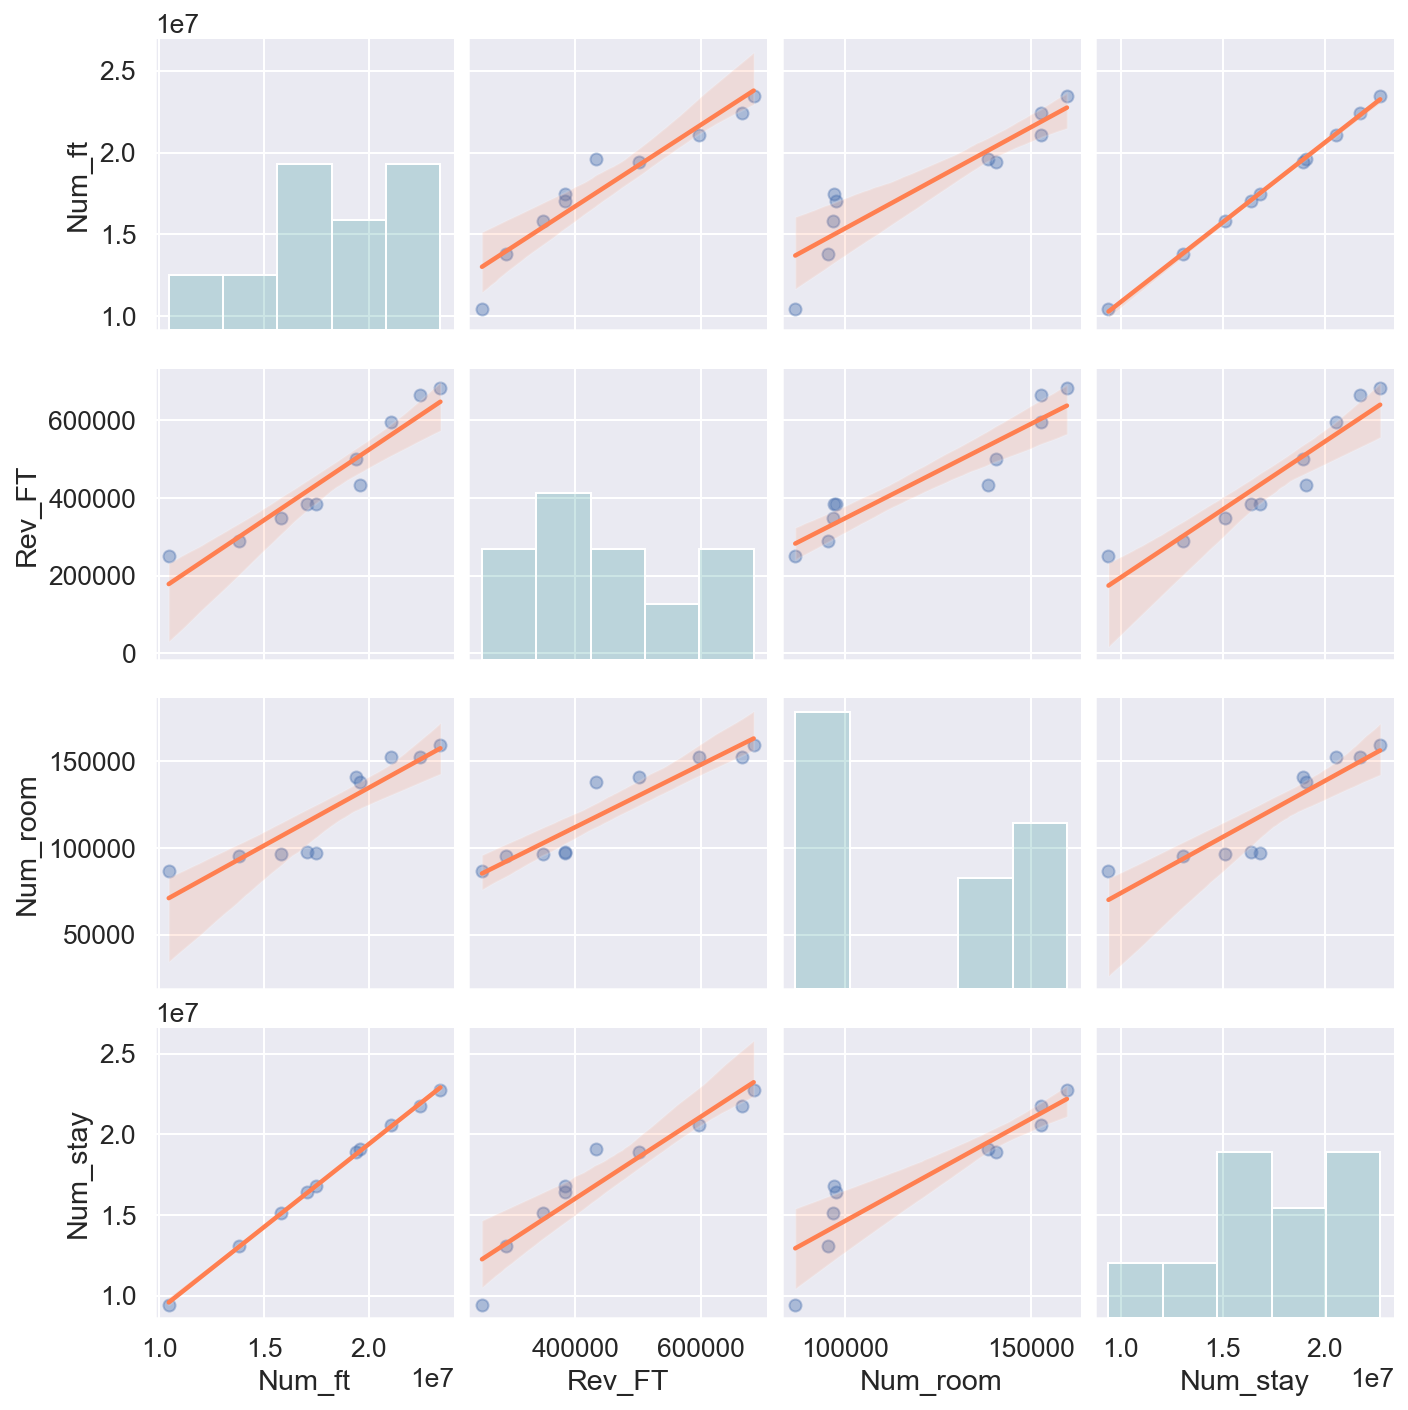

In [33]:
sns.pairplot(df_2_new,                                          
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4},      
                       'line_kws': {'color': 'coral'}},   
             diag_kws={'color': 'teal', 'alpha':.2});     

จากกราฟ ความสัมพันธ์ของแต่ละ column ใกล้เคียงกับเส้นตรง 

# Model 2: สร้าง model predict จำนวนนักท่องเที่ยวที่จะเข้าพักโรงแรมในกรุงเทพ จาก จำนวนนักท่องเที่ยวชาวต่างชาติที่ทั้งหมดที่เข้ามาในกรุงเทพฯ
โดย Linear regression

In [34]:
import sklearn
from sklearn.linear_model import LinearRegression

In [35]:
model_lr = LinearRegression()

In [36]:
X = df_2_new[['Num_ft']]
y = df_2_new['Num_stay']

model_lr.fit(X, y)

LinearRegression()

In [37]:
model_lr.score(X, y)

0.9990899896751326

## สมการ linear regression

In [38]:
model_lr.intercept_

-1121538.1040524878

In [39]:
model_lr.coef_

array([1.02521303])

In [40]:
print(f'Num_stay = {model_lr.intercept_: .3f} + {model_lr.coef_[0]: .3f}*Num_ft')

Num_stay = -1121538.104 +  1.025*Num_ft


## วัดความแม่นของโมเดลจากการ predict ข้อมูลที่ใช้ train model

In [41]:
# predict Num_stay: จำนวนนักท่องเที่ยวชาวต่างชาติที่มาเข้าพัก (คน)
y_pred_lr = model_lr.predict(X)
y_pred_lr

array([ 9585967.17599721, 13028383.39022261, 15100013.92304844,
       16786626.72920847, 16339606.16916197, 18959115.66909682,
       18779716.7173327 , 20495642.41432942, 21882060.54394801,
       22898600.26765436])

In [42]:
dp_lr=pd.concat([df_2_new[['Num_ft', 'Num_stay']].reset_index(drop=True), pd.Series(y_pred_lr.round(0), name='predicted')], axis='columns')
dp_lr

,Num_ft,Num_stay,predicted
0,10444176.0,9409418.0,9585967.0
1,13801933.0,13069420.0,13028383.0
2,15822616.0,15129646.0,15100014.0
3,17467750.0,16823969.0,16786627.0
4,17031723.0,16396925.0,16339606.0
5,19586811.0,19079586.0,18959116.0
6,19411824.0,18927322.0,18779717.0
7,21085550.0,20575172.0,20495642.0
8,22437872.0,21721074.0,21882061.0
9,23429412.0,22723201.0,22898600.0


In [43]:
model_lr.score(X, y)

0.9990899896751326

# Model 3: สร้างmodel predict รายได้การท่องเที่ยวที่จะเกิดขึ้นในกรุงเทพฯ จากจำนวนนักท่องเที่ยวต่างชาติที่เข้ามาพักและจำนวนห้องพักของสถานประกอบการที่พักแรมในกรุงเทพฯ
โดย Multiple Linear regression

In [44]:
model_mlr = LinearRegression()

In [45]:
X2 = df_2_new[['Num_stay', 'Num_room']]
y2 = df_2_new['Rev_FT']

model_mlr.fit(X2, y2)

LinearRegression()

## สมการ multiple linear regression

In [46]:
model_mlr.intercept_

-177267.91553923523

In [47]:
model_mlr.coef_

array([0.01938297, 2.4125696 ])

In [48]:
print(f'Rev_FT = {model_mlr.intercept_: .3f} + {model_mlr.coef_[0]: .3f}*Num_stay + {model_mlr.coef_[1]: .3f}*Num_room')

Rev_FT = -177267.916 +  0.019*Num_stay +  2.413*Num_room


## วัดความแม่นของโมเดลจากการ predict ข้อมูลที่ใช้ train model

In [49]:
# predict Rev_FT: รายได้การท่องเที่ยวจากนักท่องเที่ยวชาวต่างชาติ (ล้านบาท)
y_pred_mlr = model_mlr.predict(X2)
y_pred_mlr

array([214252.96092212, 306656.88463126, 349579.35462422, 382830.50128432,
       375892.09688951, 526175.70431886, 529019.36814187, 590045.53237651,
       611947.70616902, 648204.40064231])

In [50]:
dp_mlr=pd.concat([df_2_new[['Num_stay', 'Num_room', 'Rev_FT']].reset_index(drop=True), pd.Series(y_pred_mlr.round(0), name='predicted')], axis='columns')
dp_mlr

,Num_stay,Num_room,Rev_FT,predicted
0,9409418.0,86687.0,251540.18,214253.0
1,13069420.0,95583.0,290144.00,306657.0
2,15129646.0,96822.0,348286.46,349579.0
3,16823969.0,96992.0,383446.89,382831.0
4,16396925.0,97547.0,383871.90,375892.0
5,19079586.0,138286.0,432987.28,526176.0
6,18927322.0,140688.0,500707.62,529019.0
7,20575172.0,152744.0,596281.33,590046.0
8,21721074.0,152616.0,664129.59,611948.0
9,22723201.0,159593.0,683209.26,648204.0


In [51]:
model_mlr.score(X2, y2)

0.9270787533816102

---